# Tablero L's solución con backtrack

In [ ]:
# Quizás convenga preprocesar E como diccionario
# de columnas, cuyos valores sean las filas con
# estorbo.
def max_eles(n,E):
  def hay_estorbo(i,j,E):
    return (i,j) in E

  def puntos_azules(n,E):
    PA=[]
    for j in range(n-1):
      for i in range(3):
         if (not hay_estorbo(i,j,E)) and (not hay_estorbo(i+1,j,E)) and (not hay_estorbo(i+1,j+1,E)):
          PA.append((i,j))
    return PA

  PA=puntos_azules(n,E)
  print(PA)

  def bt_llenado(v,PA,maximo,max_acomodo):
    # print(v)
    if sum(v)>maximo:
      maximo, max_acomodo=sum(v),v.copy()
    if len(v)==len(PA):
      return [maximo, max_acomodo]
    candidatos=[0]
    pos_piezas_puestas=[]
    for k in range(0,len(v)):
      if v[k]==1:
        pos_piezas_puestas.append(PA[k])
    set_puestas=set(pos_piezas_puestas)
    i=PA[len(v)][0]
    j=PA[len(v)][1]
    set_malo=set([(i-1,j-1),(i-1,j),(i,j-1),(i,j+1),(i+1,j),(i+1,j+1)])
    if set_malo.intersection(set_puestas) == set():
      # print("Sí agregaré 1 pues el set malo es", set_malo, "las puestas son", set_puestas, "y la nueva posicion es", i, j)
      candidatos.append(1)
    for cand in candidatos:
      v.append(cand)
      maximo, max_acomodo = bt_llenado(v,PA,maximo,max_acomodo)
      v.pop()
    return [maximo, max_acomodo]

  maximo, max_acomodo = bt_llenado([],PA,0,[])

  return maximo, max_acomodo, puntos_azules(n,E)

In [ ]:
estorbos=[(0,1),(0,3),(2,1),(2,2),(2,6),(3,3),(1,5), (2,8), (3,9), (3,5)]
maximo,max_acomodo,PA= max_eles(10,estorbos)

print("El máximo es", maximo)
print("El acomodo es", max_acomodo)
print("Las posiciones azules son", PA)

[(0, 0), (2, 0), (0, 2), (1, 3), (1, 4), (0, 6), (0, 7), (2, 7), (0, 8)]
El máximo es 7
El acomodo es [1, 1, 1, 0, 1, 1, 0, 1, 1]
Las posiciones azules son [(0, 0), (2, 0), (0, 2), (1, 3), (1, 4), (0, 6), (0, 7), (2, 7), (0, 8)]


# Dibujar el tablero

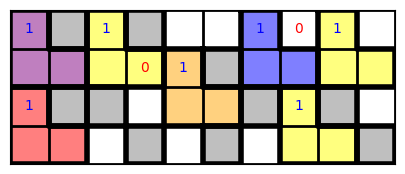

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


# Dimensiones del tablero
filas = 4
columnas = 10

# Crear una matriz de ceros para representar el tablero
tablero = np.zeros((filas, columnas))

# Dibujar las líneas del tablero
fig, ax = plt.subplots()
ax.matshow(tablero, cmap='binary') # Para que sea blanco y negro

# Personalizar el tablero
for i in range(filas + 1):
    ax.axhline(y=i - 0.5, color='black', linewidth=2)
for j in range(columnas + 1):
    ax.axvline(x=j - 0.5, color='black', linewidth=2)

# Ajustar el tamaño de la figura
fig.set_size_inches(columnas/2, filas/2)
plt.xticks([])
plt.yticks([])

# Dibujar una X en cada posición de los estorbos

for estorbo in estorbos:
    i, j = estorbo
    i-=0.5
    j-=0.5
    xs=[j,j+1,j+1,j,j]
    ys=[i,i,i+1,i+1,i]

    # Crear lista de 6 colores distinguibles:
    colores = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
    color = colores[int(i+3*j) % len(colores)]

    # Hacer polígono con vértices en un cuadrado alrededor del estorbo
    # ax.text(j, i, 'X', ha='center', va='center', color='red')

    p=Polygon(list(zip(xs,ys)),color="grey",alpha=0.5)
    ax.add_patch(p)

    # Dibujar la L, que es un poligonal con pasos derecha, abajo, derecha, abajo, izquierda, izquierda, arriba, arriba. Llenar con rojo transparente.
    ax.plot([j, j+1, j+1, j, j, j], [i, i, i+1, i+1, i, i], linewidth=4, color="black")

# Dibujar un círculo azul en cada posición de los puntos azules

for k in range(len(PA)):
    i, j = PA[k]
    if max_acomodo[k] == 1:
      ax.text(j, i, '1', ha='center', va='center', color='blue')
    else:
      ax.text(j, i, '0', ha='center', va='center', color='red')

# Dibujar una L de cuadrados en cada posición de PA, siempre y cuando haya un 1 en max_acomodo

for k in range(len(max_acomodo)):
    if max_acomodo[k] == 1:
        i, j = PA[k]
        i-=0.5
        j-=0.5
        xs=[j,j+1,j+1,j+2,j+2,j+1,j,j,j]
        ys=[i,i,i+1,i+1,i+2,i+2,i+2,i+1,i]

        # Crear lista de 6 colores distinguibles:
        colores = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
        color = colores[int(i+2*j) % len(colores)]

        p=Polygon(list(zip(xs,ys)),color=color,alpha=0.5)
        ax.add_patch(p)

        # Dibujar la L, que es un poligonal con pasos derecha, abajo, derecha, abajo, izquierda, izquierda, arriba, arriba. Llenar con rojo transparente.
        ax.plot([j, j+1, j+1, j+2, j+2, j+1, j, j, j], [i, i, i+1, i+1, i+2, i+2, i+2, i+1, i], linewidth=4, color="black")

        # Llenar poligonal

# Mostrar el tablero
plt.show()

# Tablero L's solución con programación dinámica

In [ ]:
def max_eles_PD(n,E):
  def hay_estorbo(i,j,E):
    return (i,j) in E

  tabla_PD={}

  def recursion(n,E):
    if n==1:
      return 0
    elif (n,frozenset(E)) in tabla_PD.keys():
      return tabla_PD[(n,frozenset(E))]
    else:
      mejor_caso=[0,0,0,0,0]
      estorbos_primera=[]
      estorbos_segunda=[]
      estorbos_rec=[]
      for estorbo in E:
        if estorbo[1]==0:
          estorbos_primera.append(estorbo)
        else:
          if estorbo[1]==1:
            estorbos_segunda.append(estorbo)
          estorbos_rec.append((estorbo[0],estorbo[1]-1))

      # Caso de no poner nada en la primera columna
      mejor_caso[0]=recursion(n-1,estorbos_rec)

      # Poner L hasta arriba
      if (not(hay_estorbo(0,0,E))) and (not(hay_estorbo(1,0,E))) and (not(hay_estorbo(1,1,E))):
        estorbos_caso=estorbos_rec.copy()
        estorbos_caso.append((1,0))
        mejor_caso[1]=1+recursion(n-1,estorbos_caso)

      # Poner L enmedio

      if (not(hay_estorbo(1,0,E))) and (not(hay_estorbo(2,0,E))) and (not(hay_estorbo(2,1,E))):
        estorbos_caso=estorbos_rec.copy()
        estorbos_caso.append((2,0))
        mejor_caso[2]=1+recursion(n-1,estorbos_caso)

      # Poner L hasta abajo

      if (not(hay_estorbo(2,0,E))) and (not(hay_estorbo(3,0,E))) and (not(hay_estorbo(3,1,E))):
        estorbos_caso=estorbos_rec.copy()
        estorbos_caso.append((3,0))
        mejor_caso[3]=1+recursion(n-1,estorbos_caso)

      # Poner L hasta arriba

      if (not(hay_estorbo(0,0,E))) and (not(hay_estorbo(1,0,E))) and (not(hay_estorbo(1,1,E))) and (not(hay_estorbo(2,0,E))) and (not(hay_estorbo(3,0,E))) and (not(hay_estorbo(3,1,E))):
        estorbos_caso=estorbos_rec.copy()
        estorbos_caso.append((3,0))
        estorbos_caso.append((1,0))
        mejor_caso[4]=2+recursion(n-1,estorbos_caso)

    lo_mejor=max(mejor_caso)
    tabla_PD[(n,frozenset(E))]=lo_mejor
    return lo_mejor

  return recursion(n,E)


In [ ]:
maximo=max_eles_PD(7,[(0,1),(0,3),(2,1),(2,2),(2,6),(3,3)])

In [ ]:
print(maximo)

5


# Medir tiempo de la programación dinámica

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

tiempos=[]

for n in range(1,300,10):
  inicio=datetime.now()
  if n%100==1:
    print(n, inicio)
  primera_fila=[(0,3*j) for j in range(0,n)]
  segunda_fila=[(1,3*j) for j in range(0,n)]
  cuarta_fila=[(3,3*j) for j in range(0,n)]
  instancia=primera_fila+segunda_fila+cuarta_fila
  max_eles_PD(3*n,instancia)
  fin=datetime.now()
  tiempos.append((fin-inicio).total_seconds())



1 2024-11-14 18:17:05.724482
101 2024-11-14 18:17:06.062908
201 2024-11-14 18:17:09.395012


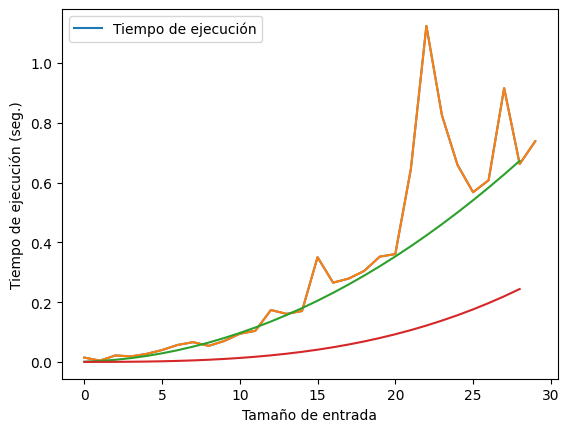

In [ ]:
plt.plot(tiempos,label='Tiempo de ejecución')
plt.legend()
plt.xlabel("Tamaño de entrada")
plt.ylabel("Tiempo de ejecución (seg.)")

cuadraticoarriba=[0.0008*x**2 for x in range(1,30)]
cuadraticoabajo=[0.00001*x**3 for x in range(1,30)]
plt.plot(tiempos,label='Tiempo de ejecución')
plt.plot(cuadraticoarriba, label='Cota superior')
plt.plot(cuadraticoabajo, label= 'Cota inferior')

# Otro ejemplo de backtrack

In [ ]:
# Colocar números del 1 al 12 en tablero de 3x3, con cada fila y columna
# de suma 18.

def BT():
  def bt(v, gran_cuenta):
    L=len(v)
    check={3:[0,1,2],6:[3,4,5],7:[0,3,6],8:[1,4,7],9:[2,5,8]}
    if L in check.keys():
      if sum(v[j] for j in check[L])!=18:
        return gran_cuenta
    # Podríamos también checar, por ejemplo, al llenar dos, si esas dos todavía
    # podrían completarse a algo que sí sume 12
    # check2={2:[0,1], 5:[3,4], 4:[0,3]}
    # if L in check2.keys():
    #   if sum(v[j] for j in check[L])+12<18:
    #     return gran_cuenta
    if L==3:
      print(v)
    if L==9:
      gran_cuenta+=1
      return gran_cuenta
    candidatos=list(range(1,12))
    for e in candidatos:
      v.append(e)
      gran_cuenta=bt(v, gran_cuenta)
      v.pop()
    return gran_cuenta
  gran_cuenta=bt([],0)

  return gran_cuenta

total=BT()
print(total)